In [102]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer


In [103]:
# load data
df_samsung = pd.read_csv('../data/samsung.csv')
df_apple = pd.read_csv('../data/apple.csv')

## Exploring and Doing Some Cleaning

### Samsung Galaxy Watch
In the following cells I'll do some exploring and cleaning in samsung dataframe and will make a new dataframe as a galaxy watch which only has usefull columns for EDA

In [104]:
df_samsung.shape

(1999, 99)

In [105]:
df_samsung.head()

,Unnamed: 0,subreddit,selftext,author_fullname,gilded,is_gallery,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,retrieved_utc,updated_utc,utc_datetime_str,post_hint,preview,poll_data,crosspost_parent_list,crosspost_parent,author_cakeday,edited_on
0,0,GalaxyWatch,NaN,t2_nmj77,0,True,Loving my Dexnor rugged case for the Watch 4 C...,"[{'e': 'text', 't': 'Watch Band'}]",r/GalaxyWatch,False,...,1677851686,1677851686,2023-03-03 13:54:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,GalaxyWatch,NaN,t2_75obcdr8,0,NaN,The UPDATE is out! 😍📣 Do you have any other su...,"[{'e': 'text', 't': 'Watch Face'}]",r/GalaxyWatch,False,...,1677847798,1677847799,2023-03-03 12:49:48,image,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN,NaN
2,2,GalaxyWatch,NaN,t2_qgx0x7u,0,NaN,My 5 Pro. I'm happy!,[],r/GalaxyWatch,False,...,1677846582,1677846583,2023-03-03 12:29:28,image,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN,NaN
3,3,GalaxyWatch,NaN,t2_a1z1vo8s,0,True,Galaxy Watch4 not recording steps during worko...,"[{'e': 'text', 't': 'Fitness'}]",r/GalaxyWatch,False,...,1677843181,1677843182,2023-03-03 11:32:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GalaxyWatch,NaN,t2_9ws98aex,0,NaN,Nothing face (2),"[{'e': 'text', 't': 'Watch Face'}]",r/GalaxyWatch,False,...,1677840217,1677840218,2023-03-03 10:43:19,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN


In [106]:
# checking for nulls
df_samsung.isna().sum()

Unnamed: 0                  0
subreddit                   0
selftext                  741
author_fullname             7
gilded                      0
                         ... 
poll_data                1986
crosspost_parent_list    1987
crosspost_parent         1987
author_cakeday           1992
edited_on                1998
Length: 99, dtype: int64

In [107]:
# cite for using map str: https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/#:~:text=Combine%20Two%20Columns%20Using%20%2B%20Operator,does%20addition%20instead%20of%20concatenation.
df_samsung['selftext'] = df_samsung['selftext'].fillna('')
df_samsung['description'] = df_samsung['selftext'].map(str) + df_samsung['title']

In [108]:
# check description column
df_samsung.loc[:,['title', 'selftext', 'description']]

,title,selftext,description
0,Loving my Dexnor rugged case for the Watch 4 C...,,Loving my Dexnor rugged case for the Watch 4 C...
1,The UPDATE is out! 😍📣 Do you have any other su...,,The UPDATE is out! 😍📣 Do you have any other su...
2,My 5 Pro. I'm happy!,,My 5 Pro. I'm happy!
3,Galaxy Watch4 not recording steps during worko...,,Galaxy Watch4 not recording steps during worko...
4,Nothing face (2),,Nothing face (2)
...,...,...,...
1994,Battery drain on Galaxy Watch 5 LTE 40mm,"Hi all,\n\nI got my mum a Galaxy Watch 5 LTE 4...","Hi all,\n\nI got my mum a Galaxy Watch 5 LTE 4..."
1995,This watch face idea was a challenge but I thi...,,This watch face idea was a challenge but I thi...
1996,How to make watch4 stop asking for my location?,I've been trying to use my galaxy watch for he...,I've been trying to use my galaxy watch for he...
1997,Great to not have to worry about battery life ...,,Great to not have to worry about battery life ...


In [109]:
df_samsung['num_comments'].value_counts()

0     1914
1       70
2        6
5        2
14       2
8        1
17       1
6        1
7        1
16       1
Name: num_comments, dtype: int64

In [110]:
# make a new dataframe for EDA
df_galaxywatch = df_samsung.loc[:,['author', 'description', 'num_comments', 'subreddit']]
df_galaxywatch.head()

,author,description,num_comments,subreddit
0,vincentstarjammer,Loving my Dexnor rugged case for the Watch 4 C...,0,GalaxyWatch
1,MyWatchFace,The UPDATE is out! 😍📣 Do you have any other su...,0,GalaxyWatch
2,N7801Z,My 5 Pro. I'm happy!,0,GalaxyWatch
3,conscious_menace22,Galaxy Watch4 not recording steps during worko...,0,GalaxyWatch
4,No-Impress3806,Nothing face (2),0,GalaxyWatch


In [161]:
# check for nulls in new datafarme
df_galaxywatch.isna().sum()

author          0
description     0
num_comments    0
subreddit       0
dtype: int64

In [162]:
df_galaxywatch.head()

,author,description,num_comments,subreddit
0,vincentstarjammer,Loving my Dexnor rugged case for the Watch 4 C...,0,GalaxyWatch
1,MyWatchFace,The UPDATE is out! 😍📣 Do you have any other su...,0,GalaxyWatch
2,N7801Z,My 5 Pro. I'm happy!,0,GalaxyWatch
3,conscious_menace22,Galaxy Watch4 not recording steps during worko...,0,GalaxyWatch
4,No-Impress3806,Nothing face (2),0,GalaxyWatch


In [115]:
# export and save galaxywatch dataframe
df_galaxywatch.to_csv('../data/galaxy_watch.csv')

### Apple Watch
In the following cells I'll do some exploring and cleaning in apple dataframe and will make a new dataframe as a apple watch which only has usefull columns for EDA

In [132]:
df_apple.shape

(1996, 99)

In [133]:
df_apple.head()

,Unnamed: 0,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,...,updated_utc,utc_datetime_str,is_gallery,media_metadata,gallery_data,poll_data,crosspost_parent_list,crosspost_parent,edited_on,author_cakeday
0,0,AppleWatch,NaN,t2_458myj88,0,Those Apple Watch Ultra Mod kit are looking go...,"[{'e': 'text', 't': 'My Watch'}]",r/AppleWatch,False,6,...,1677851306,2023-03-03 13:48:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AppleWatch,Is there a way to increase the time between a ...,t2_1jb43o9,0,How to increase the time you can raise your wa...,"[{'e': 'text', 't': 'Support'}]",r/AppleWatch,False,6,...,1677849922,2023-03-03 13:25:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AppleWatch,Just want an app that I can use the record my ...,t2_5wg09ols,0,App recommendation for cycling navigation?,"[{'e': 'text', 't': 'App'}]",r/AppleWatch,False,6,...,1677849014,2023-03-03 13:10:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AppleWatch,[removed],t2_40hlimdky,0,"Fitness recovery app that monitors HRV, Sleep,...","[{'e': 'text', 't': 'App'}]",r/AppleWatch,False,6,...,1677848690,2023-03-03 13:04:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AppleWatch,NaN,t2_5e4f5wpw,0,Move goal 300%,"[{'e': 'text', 't': 'Activity'}]",r/AppleWatch,False,6,...,1677848542,2023-03-03 13:02:10,True,"{'baro2dclvila1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': '5jzjbcclvila1', 'id':...",NaN,NaN,NaN,NaN,NaN


In [134]:
# check for null values
df_apple.isna().sum()

Unnamed: 0                  0
subreddit                   0
selftext                  733
author_fullname             7
gilded                      0
                         ... 
poll_data                1975
crosspost_parent_list    1977
crosspost_parent         1977
edited_on                1994
author_cakeday           1993
Length: 99, dtype: int64

In [135]:
# cite for using map: https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/#:~:text=Combine%20Two%20Columns%20Using%20%2B%20Operator,does%20addition%20instead%20of%20concatenation.
df_apple['selftext'] = df_apple['selftext'].fillna('')
df_apple['description'] = df_apple['selftext'].map(str) + df_apple['title']

In [136]:
# check description column
df_apple.loc[:,['title', 'selftext', 'description']]

,title,selftext,description
0,Those Apple Watch Ultra Mod kit are looking go...,,Those Apple Watch Ultra Mod kit are looking go...
1,How to increase the time you can raise your wa...,Is there a way to increase the time between a ...,Is there a way to increase the time between a ...
2,App recommendation for cycling navigation?,Just want an app that I can use the record my ...,Just want an app that I can use the record my ...
3,"Fitness recovery app that monitors HRV, Sleep,...",[removed],[removed]Fitness recovery app that monitors HR...
4,Move goal 300%,,Move goal 300%
...,...,...,...
1991,I came back to iPhone after 7 years and I fina...,,I came back to iPhone after 7 years and I fina...
1992,Screenshots delayed,"I tried to take a screen shot today, and they ...","I tried to take a screen shot today, and they ..."
1993,AW Ultra having trouble with HR and Peloton,During any Peloton bike workout my AWU loses H...,During any Peloton bike workout my AWU loses H...
1994,Apple Watch Ultra will not stay locked during ...,"Specifically, weight training. Auto pause is a...","Specifically, weight training. Auto pause is a..."


In [137]:
df_apple['num_comments'].value_counts()

0     1946
1       14
4        9
3        7
2        6
5        3
7        2
10       2
6        2
9        1
28       1
18       1
24       1
12       1
Name: num_comments, dtype: int64

In [138]:
# make a new dataframe for EDA
df_applewatch = df_apple.loc[:,['author', 'description', 'num_comments', 'subreddit']]
df_applewatch.head()

,author,description,num_comments,subreddit
0,Mnml_Id,Those Apple Watch Ultra Mod kit are looking go...,0,AppleWatch
1,BigMasterDingDong,Is there a way to increase the time between a ...,0,AppleWatch
2,Cedar_Wood_State,Just want an app that I can use the record my ...,0,AppleWatch
3,clarebear-82,[removed]Fitness recovery app that monitors HR...,0,AppleWatch
4,tomo128,Move goal 300%,0,AppleWatch


In [139]:
# look for uncertain text
df_applewatch.loc[df_applewatch['description'].str.contains('remove'),:].head()

,author,description,num_comments,subreddit
3,clarebear-82,[removed]Fitness recovery app that monitors HR...,0,AppleWatch
12,More_Day_4322,[removed]hrm-pro plus belt connected to iWatch,0,AppleWatch
131,HydroAeolius,[removed]Small charger/short cable,0,AppleWatch
146,Shawdow_Colossus,[removed]Apple Watch doesn’t have notes app,0,AppleWatch
181,StarrySkyWolfxx,[removed]Apple Watch ultra or series 8,3,AppleWatch


In [140]:
# remove uncertain text
#df_applewatch['description']=df_applewatch['description'].str.replace('[removed]', '')

In [141]:
# check for nulls again
df_applewatch.isna().sum()

author          0
description     0
num_comments    0
subreddit       0
dtype: int64

In [142]:
# export and save a new dataframe
df_applewatch.to_csv('../data/apple_watch.csv')

## EDA (Exploratory Data Analysis)

Here I'll do some EDA on my both dataframes to find any relationship between varibales, find high value information for presenting and also make new columns to see if I could use them for analysis

### Samsung Galaxy Watch

In the following I'll do some EDA on galaxy watch data frame

In [166]:
# drop column
df_galaxy = df_galaxywatch.drop(columns=['subreddit'], axis=1)

In [167]:
df_galaxy.dtypes

author          object
description     object
num_comments     int64
dtype: object

In [168]:
# make a new column to show word count of description
df_galaxy['des_word_count'] = df_galaxy['description'].str.split().str.len()

In [169]:
# five longest descriptions
df_galaxy.sort_values(by = 'des_word_count', ascending=False).head()

,author,description,num_comments,des_word_count
1893,megazonengs,\n\nThe Samsung Gear S3 Frontier is a versati...,0,2828
1572,baiduelectronics,One of the standout features of the [**Google ...,0,1394
513,Alcoholfreeliketwice,So I’ve decided I’m gonna get the s23 ultra in...,0,685
585,Gadgety1,Wondering why I received this recommendation t...,0,651
212,Awkward-Pick4117,"OK, this may take some time, but here are the ...",0,493


In [170]:
# five shortest description
df_galaxy.sort_values(by = 'des_word_count', ascending=False).tail()

,author,description,num_comments,des_word_count
1681,Texshroom,Galaxy Rolex,0,2
278,Independent-Elk9983,OPinions?,0,1
277,Independent-Elk9983,OPinions,0,1
276,Independent-Elk9983,OPinions?,0,1
887,CheapScientist5603,malware,0,1


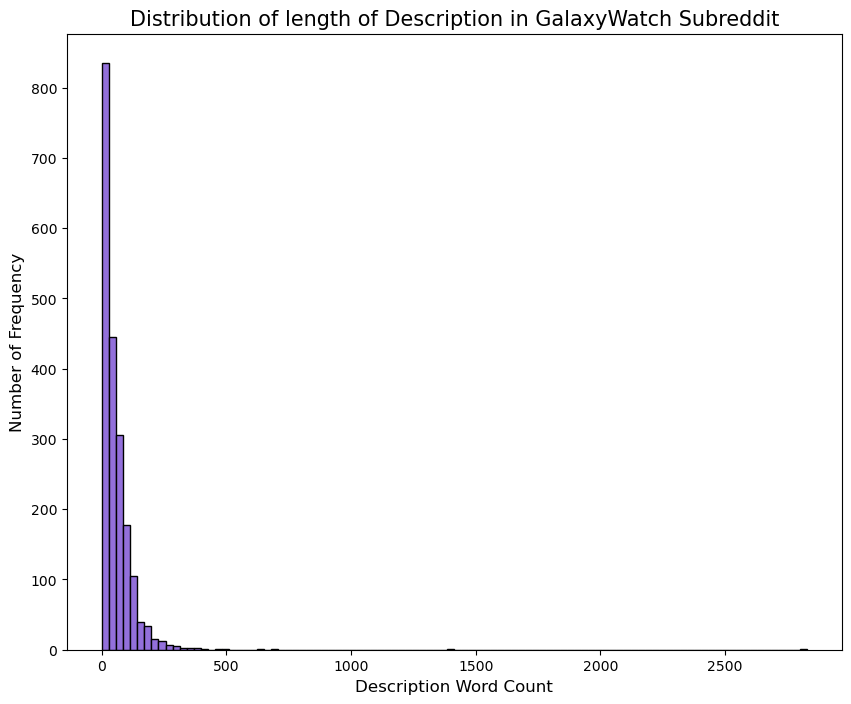

In [189]:
# distribution of description length based on word count
#Define size of bar plot
plt.figure(figsize=(10,8))
plt.hist(df_galaxy['des_word_count'], bins = 100, color = 'mediumpurple', edgecolor = 'black')
#Add chart labels
plt.title('Distribution of length of Description in GalaxyWatch Subreddit', fontsize=15)
plt.xlabel('Description Word Count', fontsize=12)
plt.ylabel('Number of Frequency', fontsize=12);

In [122]:
# descriptions with highest comments
plt.figure(figsize=(10,8))
df_galaxy.sort_values(by = 'num_comments', ascending=False).head()

,author,description,num_comments,des_word_count
67,MyWatchFace,Do you guys like car/instrument cluster themed...,17,11
76,[deleted],[deleted]Watch won't let me insert pin. Can't ...,16,14
66,Own_Statement_8788,Galaxy Watch 6 to have larger battery than the...,14,11
69,nighty-watch-faces,"I designed this watch face recently, wanted to...",14,11
61,Naitsab243,"Hello,\n\nI am currently contemplating buying ...",8,121


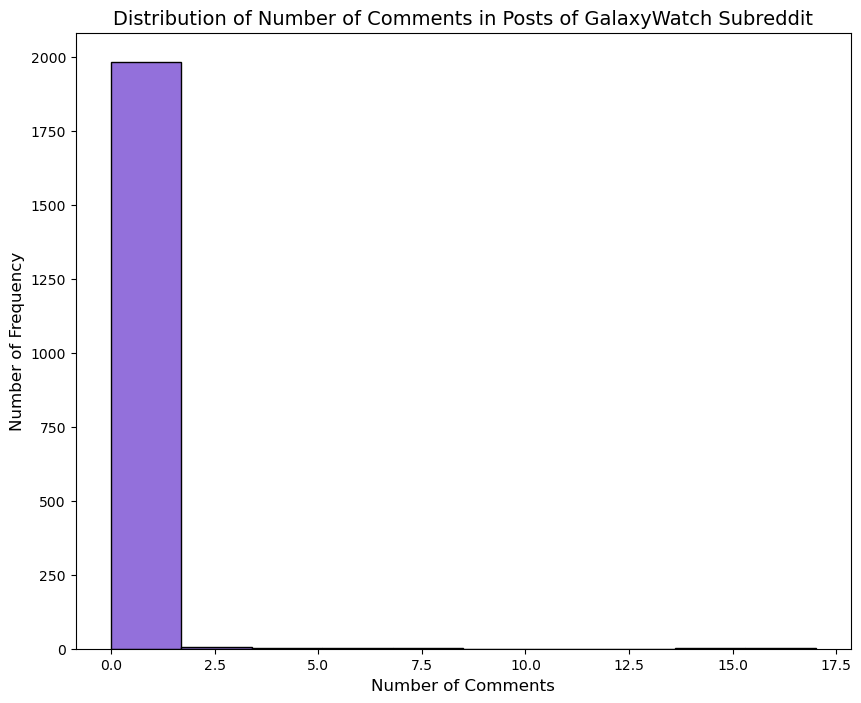

In [198]:
# distribution of number of comments
#Define size of bar plot
plt.figure(figsize=(10,8))
plt.hist(df_galaxy['num_comments'], bins = 10, color = 'mediumpurple', edgecolor = 'black')
plt.title('Distribution of Number of Comments in Posts of GalaxyWatch Subreddit', fontsize=14)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Number of Frequency', fontsize=12);

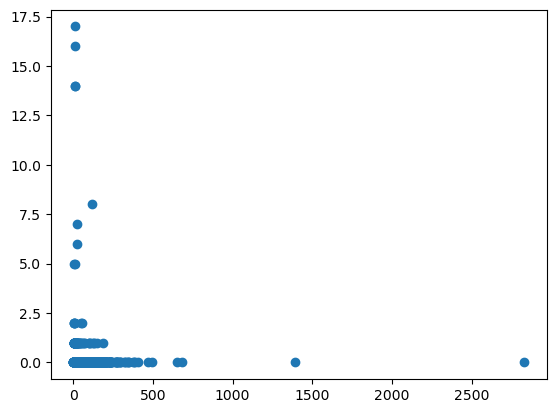

In [124]:
# relationship with lenght of description and number of comments
plt.scatter(df_galaxy['des_word_count'], df_galaxy['num_comments']);

In [125]:
# number of unique authors
df_galaxy['author'].nunique()

1453

In [126]:
# filtering description and counting them by their authors
df_galaxy.groupby('author')['description'].agg(['count']).sort_values('count', ascending = False)

,count
author,
No-Impress3806,18
DADAMWF,17
sujay_1423,13
hamid-rasoulipanah,12
Tasty_Philosophy8452,11
...,...
Old-Buy4033,1
Ok_Highlight_2782,1
OkSpell119,1


In [201]:

positive_words = ['delight', 'good', 'great', 'awesome', 'tremendous', 'fabulous', 'amazing', 'stellar']
negative_words = ['garbage', 'sad', 'trash', 'ugly', 'bad', 'disgusting', 'terrible', 'gross']

In [232]:
# filter on the author with highest number of description to see the lenghts, number of comments
# and also his/her discriptions
df_galaxy.loc[(df_galaxy['author'] == 'No-Impress3806'), :]

,author,description,num_comments,des_word_count
4,No-Impress3806,Nothing face (2),0,3
122,No-Impress3806,Galaxy watch 4 + Nothing phone (1) + OnePlus b...,0,17
779,No-Impress3806,cheaper for everyone c:,0,4
780,No-Impress3806,made the nothing watch face cheaper for everyo...,0,13
781,No-Impress3806,"made the nothing face cheaper for everyone, ho...",0,12
972,No-Impress3806,\n\n[View Poll](https://www.reddit.com/poll/10...,0,11
978,No-Impress3806,reduced the prices on all my watch faces (exce...,0,13
1109,No-Impress3806,let's goooo,0,2
1112,No-Impress3806,y'all like this sorta design? is it readable e...,0,9
1114,No-Impress3806,is it readable enough? just playing around wit...,0,12


In [250]:
# instantiate CountVectorizer and ftit and transform on corpus
X = df_galaxy['description']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3))
cvec.fit(X)
X = cvec.transform(X)

In [251]:
# convert X to dataframe
df_galvec = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())
df_galvec.shape

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1999, 95031)

In [252]:
# sort dataframe for most occuring words
df_galvec.sum().sort_values(ascending=False).head(25)

watch           3127
galaxy          1000
phone            760
galaxy watch     736
samsung          612
app              472
just             459
battery          450
pro              415
like             401
use              352
google           342
ve               324
update           308
know             287
does             287
face             286
time             278
amp              254
new              247
got              239
classic          238
watch face       228
way              227
using            212
dtype: int64

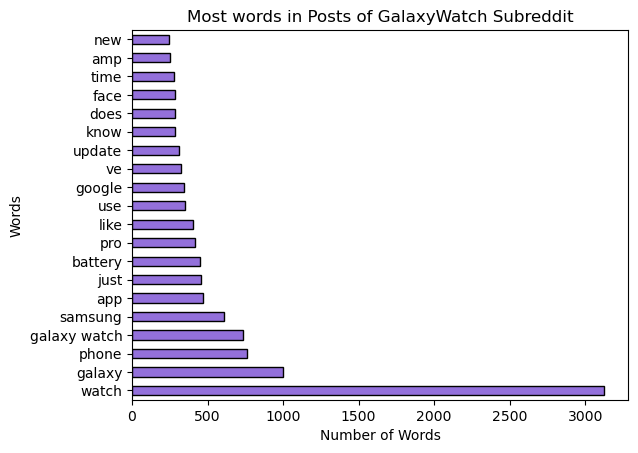

In [256]:
# plot most occured words
df_galvec.sum().sort_values(ascending=False).head(20).plot(kind='barh',
                            color = 'mediumpurple', edgecolor = 'black')
plt.title('Most words in Posts of GalaxyWatch Subreddit', fontsize=12)
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Words', fontsize=10);

### Apple Watch

Making columns that countain the number of words in title and description

In [175]:
# drop column
df_appwatch = df_applewatch.drop(columns=['subreddit'], axis=1)

In [176]:
df_appwatch.dtypes

author          object
description     object
num_comments     int64
dtype: object

In [177]:
# make a new column to show word count of description
df_appwatch['des_word_count'] = df_appwatch['description'].str.split().str.len()

In [178]:
# five longest description
df_appwatch.sort_values(by = 'des_word_count', ascending=False).head()

,author,description,num_comments,des_word_count
1755,urcrain,There’s no doubting that the Apple Watch has p...,0,825
781,thetuko,Apple announced international roaming would be...,0,747
1500,sullf,"Hi, Apple Watch community, \nMy name is Fred...",0,575
330,quinnbryant,"Right, so for the past week I have experienced...",0,545
1934,realwoodbox,I got the Apple watch to help with my heath. ...,0,472


In [179]:
# five shortest description
df_appwatch.sort_values(by = 'des_word_count', ascending=False).tail()

,author,description,num_comments,des_word_count
1827,Single_Ad_843,Busy day,0,2
1980,karmante,🥱,0,1
1852,rr210600,duality,0,1
875,fh5h,Weird,0,1
1611,Alternative_Type2555,Lina,0,1


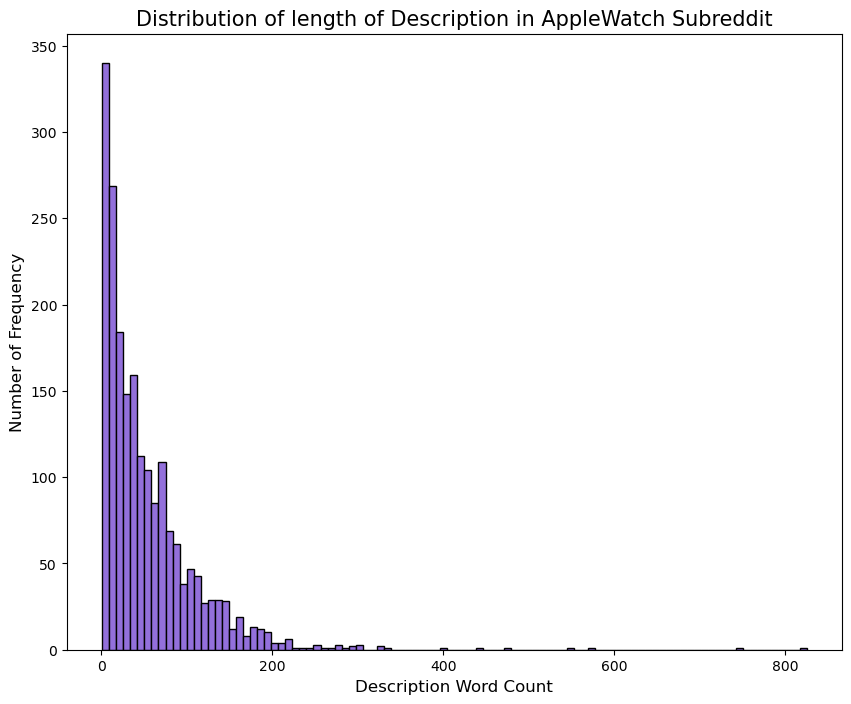

In [187]:
# distribution of description length based on word count
#Define size of bar plot
plt.figure(figsize=(10,8))
plt.hist(df_appwatch['des_word_count'], bins = 100, color = 'mediumpurple', edgecolor = 'black')
plt.title('Distribution of length of Description in AppleWatch Subreddit', fontsize=15)
plt.xlabel('Description Word Count', fontsize=12)
plt.ylabel('Number of Frequency', fontsize=12);

In [181]:
# descriptions with highest comments
df_appwatch.sort_values(by = 'num_comments', ascending=False).head()

,author,description,num_comments,des_word_count
166,monkeyofthefunk,I’ve always wanted a Pro or Pro Max Product Re...,28,78
185,lpug21,Hey all!\n\nMy partner and I recently picked u...,24,221
183,tommza_88,"Hi friends, just got my new iPhone 14 and tran...",18,38
194,acodysseygirl72,Does anyone recognize this watch face? I know ...,12,19
176,dudeneedshelp874,Black and volt..,10,3


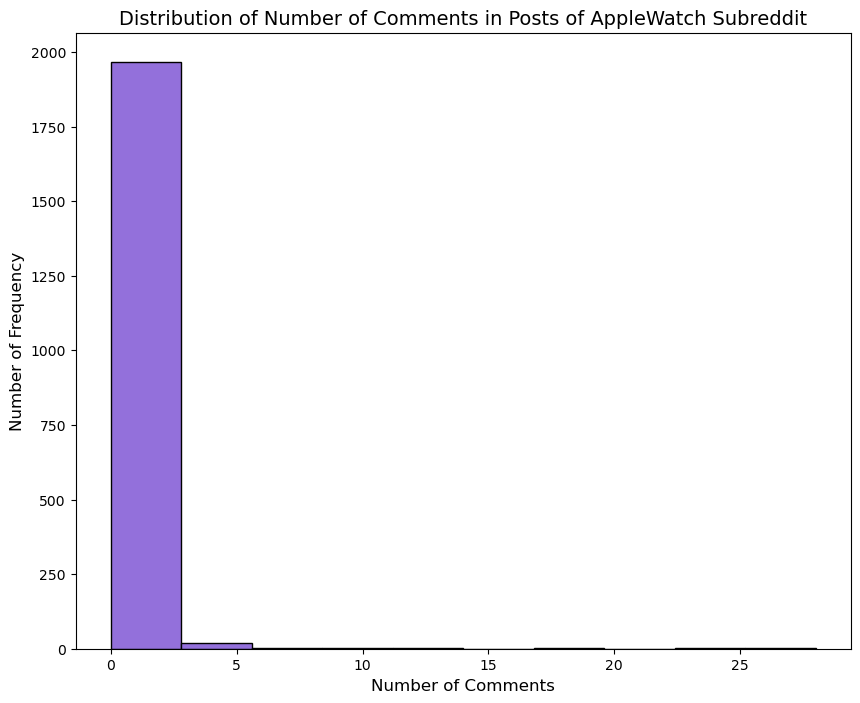

In [197]:
# distribution of number of comments
# Define size of bar plot
plt.figure(figsize=(10,8))
plt.hist(df_appwatch['num_comments'], bins = 10, color = 'mediumpurple', edgecolor = 'black')
plt.title('Distribution of Number of Comments in Posts of AppleWatch Subreddit', fontsize=14)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Number of Frequency', fontsize=12);

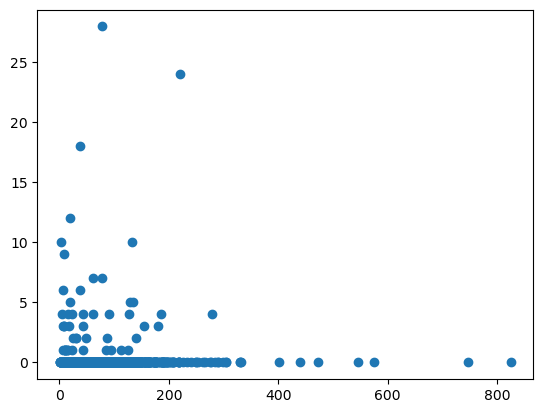

In [234]:
# relationship with lenght of description and number of comments
plt.scatter(df_appwatch['des_word_count'], df_appwatch['num_comments']);

In [235]:
# number of unique authors
df_appwatch['author'].nunique()

1629

In [236]:
# filtering description and counting them by their authors
df_appwatch.groupby('author')['description'].agg(['count']).sort_values('count', ascending = False)

,count
author,
Chasepaw21,20
minif56mike,10
AXXXXXXXXA,9
arjentic,8
PatTheDog123,8
...,...
Novemberx123,1
Novel-Highlight-3539,1
Not_Solid_System,1


In [237]:
# filter on the author with highest number of description to see the lenghts, number of comments
# and also his/her discriptions
df_appwatch.loc[df_appwatch['author'] == 'Chasepaw21', :]

,author,description,num_comments,des_word_count
803,Chasepaw21,Are some sport bands stiffer than other colors...,0,17
804,Chasepaw21,\n\n[View Poll](https://www.reddit.com/poll/11...,0,5
808,Chasepaw21,Me left\n\n[View Poll](https://www.reddit.com/...,0,15
895,Chasepaw21,Which sport band should I pick for my 41mm spa...,0,27
923,Chasepaw21,I am wondering how long will the sport band la...,0,21
925,Chasepaw21,At what date will Apple release the Fall bands?,0,9
953,Chasepaw21,What colors do you think will Apple release fo...,0,25
962,Chasepaw21,Suggestion for an AW full body protector?,0,7
963,Chasepaw21,Does Apple still sell the Spring band in the S...,0,10
1001,Chasepaw21,\n\n[View Poll](https://www.reddit.com/poll/11...,0,7


### could work on first author to see the kind of descriptions he made

In [238]:
# instantiate CountVectorizer and ftit and transform on corpus
X = df_appwatch['description']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3))
cvec.fit(X)
X = cvec.transform(X)

In [239]:
# convert X to dataframe
df_appvec = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())
df_appvec.shape

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1996, 89737)

In [240]:
# sort dataframe for most occuring words
df_appvec.sum().sort_values(ascending=False).head(25)

watch          2388
apple          1552
apple watch    1102
just            500
app             486
series          453
like            406
sleep           362
ultra           360
phone           351
iphone          343
ve              300
band            300
use             291
time            287
does            281
battery         275
new             256
know            251
got             234
don             211
way             208
want            194
heart           187
day             184
dtype: int64

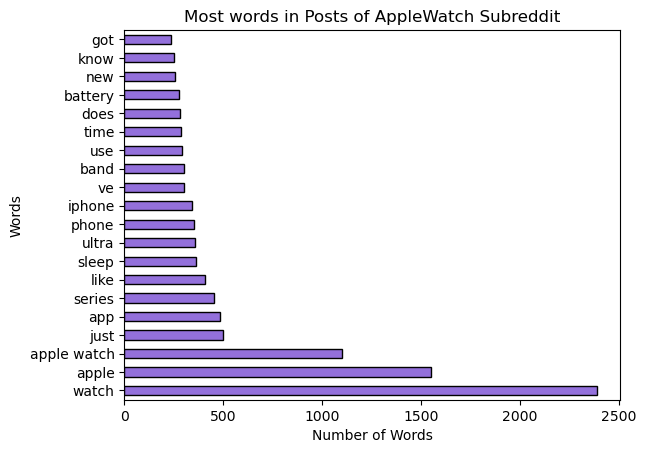

In [257]:
# plot most occured words
# Define size of bar plot

df_appvec.sum().sort_values(ascending=False).head(20).plot(kind='barh',
                            color = 'mediumpurple', edgecolor = 'black')
plt.title('Most words in Posts of AppleWatch Subreddit', fontsize=12)
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Words', fontsize=10);